## Trabalho 2

### Bibliotecas

In [32]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando o dataset escolhido

Descrição oficial do dataset:
- Blood Transfusion Service Center
- Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

In [33]:
bloodtsc = fetch_openml("blood-transfusion-service-center", version=1, as_frame=False)

df = pd.DataFrame(bloodtsc.data, columns=bloodtsc.feature_names)
df.head()

,V1,V2,V3,V4
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


### Informações importantes

In [34]:
print(bloodtsc.DESCR)

**Author**: Prof. I-Cheng Yeh  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)  
**Please cite**: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.   

**Blood Transfusion Service Center Data Set**  
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan. This is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. 

### Attribute Information  
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total bloo

### Rename das colunas

In [35]:
df.rename(columns={'V1': 'Recency', 'V2': 'Frequency', 'V3': 'Monetary', 'V4': 'Time'}, inplace=True)
df.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


### Target

Com base na descrição oficial:

- '2' significa doou sangue.
- '1' significa não doou sangue.

In [36]:
df['Donated'] = bloodtsc.target
df['Donated'] = df['Donated'].apply(lambda x: 1 if x == '2' else 0)
df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### Informações Relevantes, Amostras e Atributos

In [37]:
print(f'Dimensão: {df.shape}\n'), df.info()

Dimensão: (748, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


(None, None)

### Análise das Classes

In [38]:
df['Donated'].value_counts()

Donated
0    570
1    178
Name: count, dtype: int64

A classe é desbalanceada

### Nulos e Duplicados

In [39]:
print(f'Nulos por coluna:\n{df.isnull().sum()}')
print(f'\nLinhas Duplicadas: {df.duplicated().sum()}')

Nulos por coluna:
Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64

Linhas Duplicadas: 215


Muitas linhas repetidas, é necessário apagar as duplicatas

### Identificação de Outliers 

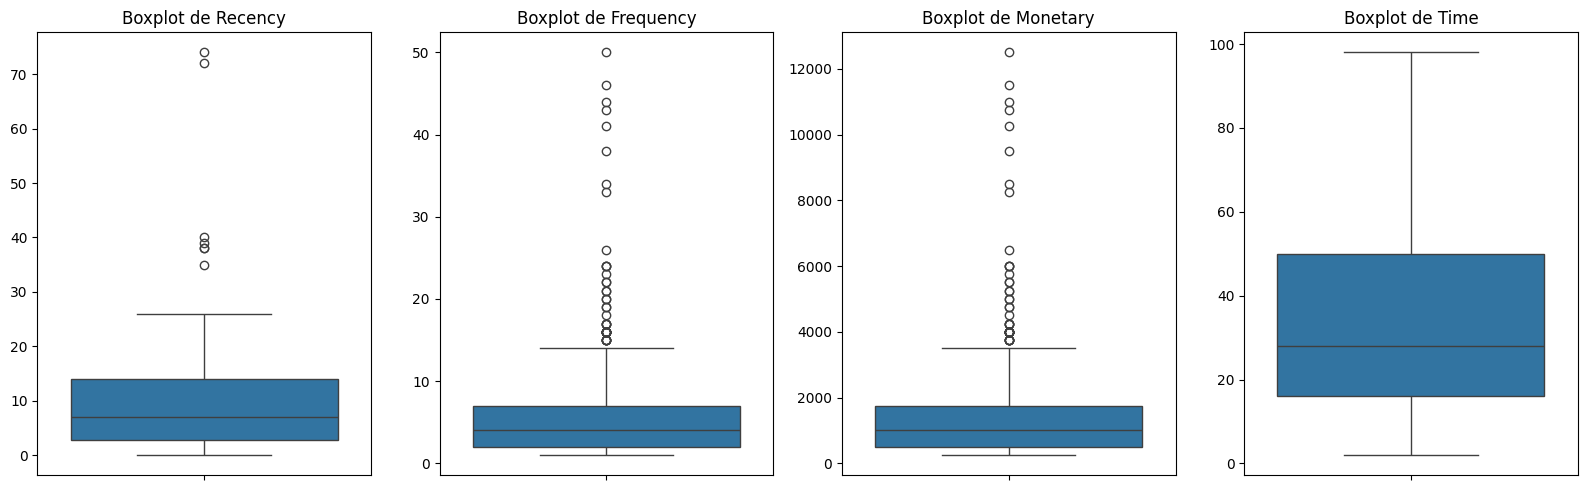

In [40]:
feature_columns = df.columns

plt.figure(figsize=(20, 5))
for i, column in enumerate(feature_columns[:4]):
    plt.subplot(1, len(feature_columns), i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

É notável a existência de outliers

### Análise dos Dados Brutos

Obter média, desvio padrão, mínimo, máximo e quartis

In [41]:
df_features = df[feature_columns[:4]]

data_description = df_features.describe()
print("Estatísticas Descritivas (Média, Desvio Padrão, Mín/Máx)")
print(data_description)

Estatísticas Descritivas (Média, Desvio Padrão, Mín/Máx)
          Recency   Frequency      Monetary        Time
count  748.000000  748.000000    748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086
std      8.095396    5.839307   1459.826781   24.376714
min      0.000000    1.000000    250.000000    2.000000
25%      2.750000    2.000000    500.000000   16.000000
50%      7.000000    4.000000   1000.000000   28.000000
75%     14.000000    7.000000   1750.000000   50.000000
max     74.000000   50.000000  12500.000000   98.000000


Calcular a variância para cada atributo

In [42]:
data_variance = df_features.var()
print("Variância de cada Atributo")
print(data_variance)

Variância de cada Atributo
Recency      6.553543e+01
Frequency    3.409751e+01
Monetary     2.131094e+06
Time         5.942242e+02
dtype: float64


Calcular e visualizar a matriz de correlação

Matriz de Correlação
            Recency  Frequency  Monetary      Time
Recency    1.000000  -0.182745 -0.182745  0.160618
Frequency -0.182745   1.000000  1.000000  0.634940
Monetary  -0.182745   1.000000  1.000000  0.634940
Time       0.160618   0.634940  0.634940  1.000000


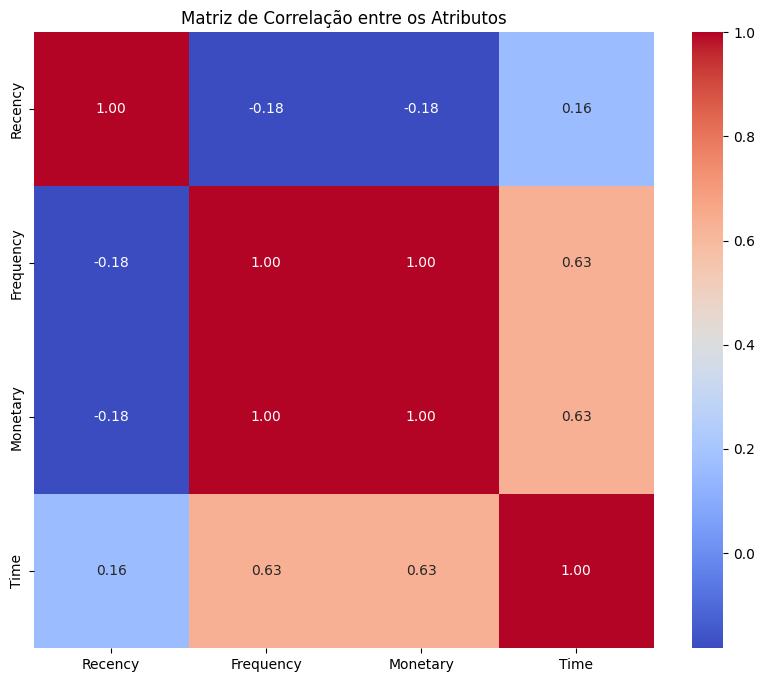

In [43]:
correlation_matrix = df_features.corr()
print("Matriz de Correlação")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre os Atributos')
plt.show()

### Remoção das linhas duplicadas

In [44]:
df.drop_duplicates(inplace=True)

print(f'Nova dimensão da tabela: {df.shape}')
print(f'\nLinhas Duplicadas: {df.duplicated().sum()}')
df['Donated'].value_counts()

Nova dimensão da tabela: (533, 5)

Linhas Duplicadas: 0


Donated
0    384
1    149
Name: count, dtype: int64

In [45]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, cohen_kappa_score, r2_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import time

# --- 1. Definição dos Dados ---
# Garantindo que X e y estão limpos (pós remoção de duplicatas)
X = df.drop('Donated', axis=1)
y = df['Donated']

print(f"Iniciando processamento com {len(X)} amostras...")
print("-" * 50)

# --- 2. GRID SEARCH (Otimização de Hiperparâmetros) ---
# O objetivo aqui é encontrar a melhor configuração do SVM.
# Usamos StratifiedKFold=5 aqui apenas para encontrar os parâmetros rapidamente.
# A validação final será via LeaveOneOut como manda o trabalho.

print("Etapa 1: Executando Grid Search para encontrar melhores hiperparâmetros...")

pipeline_grid = ImbPipeline([
    ('scaler', StandardScaler()),      # 1. Normaliza
    ('smote', SMOTE(random_state=42)), # 2. Balanceia (sintético)
    ('svm', SVC())                     # 3. Classifica
])

# Parâmetros para testar (Espaço de busca focado para SVM)
# C: Penalidade de erro. Kernel: Tipo da fronteira de decisão.
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    pipeline_grid, 
    param_grid, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring='f1', 
    n_jobs=-1
)

grid_search.fit(X, y)
best_params = grid_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")
print("-" * 50)

# --- 3. VALIDAÇÃO LEAVE-ONE-OUT (30 Execuções) ---
# O PDF pede 30 execuções. Como SVM é determinístico, a variação virá 
# da semente aleatória do SMOTE em cada rodada.

print("Etapa 2: Executando 30 rodadas de Leave One Out (isso pode demorar)...")

# Listas para guardar as métricas
metrics = {
    'Acurácia': [], 'F1': [], 'Recall': [], 'Kappa': [], 'R2': []
}

# Configuração do modelo ótimo
best_C = best_params['svm__C']
best_kernel = best_params['svm__kernel']
best_gamma = best_params['svm__gamma']

loo = LeaveOneOut()
start_total = time.time()

for i in range(1):
    # Monitor de progresso
    print(f"Rodada {i+1}/30...", end='\r')
    
    # Pipeline Final da Rodada 'i'
    # Mudamos o random_state do SMOTE para garantir variabilidade estatística
    model_final = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=i)), 
        ('svm', SVC(C=best_C, kernel=best_kernel, gamma=best_gamma))
    ])
    
    # cross_val_predict com cv=loo gera uma predição para cada amostra individualmente
    # simulando o treino com n-1 amostras para todas as amostras.
    y_pred = cross_val_predict(model_final, X, y, cv=loo, n_jobs=-1)
    
    # Cálculos da rodada
    metrics['Acurácia'].append(accuracy_score(y, y_pred))
    metrics['F1'].append(f1_score(y, y_pred))
    metrics['Recall'].append(recall_score(y, y_pred))
    metrics['Kappa'].append(cohen_kappa_score(y, y_pred))
    metrics['R2'].append(r2_score(y, y_pred))

print(f"\nConcluído em {time.time() - start_total:.2f} segundos.")
print("-" * 50)

# --- 4. GERAÇÃO DE RESULTADOS (LATEX) ---

# Função auxiliar para formatar média +- desvio padrão
def fmt(metric_list):
    mean = np.mean(metric_list)
    std = np.std(metric_list)
    return f"{mean:.3f} $\\pm$ {std:.3f}"

# Construindo o conteúdo da tabela
results_latex = f"""
% Tabela de Resultados (Copie para o Overleaf)
\\begin{{table}}[h]
\\centering
\\caption{{Média e Desvio Padrão das Métricas (30 execuções - LeaveOneOut + SVM)}}
\\label{{tab:resultados}}
\\begin{{tabular}}{{lccccc}}
\\hline
\\textbf{{Classificador}} & \\textbf{{Acurácia}} & \\textbf{{F1}} & \\textbf{{Recall}} & \\textbf{{Kappa}} & \\textbf{{$R^2$}} \\\\ \\hline
SVM (Otimizado) & {fmt(metrics['Acurácia'])} & {fmt(metrics['F1'])} & {fmt(metrics['Recall'])} & {fmt(metrics['Kappa'])} & {fmt(metrics['R2'])} \\\\ \\hline
\\end{{tabular}}
\\end{{table}}

% Tabela de Melhores Parâmetros
\\begin{{table}}[h]
\\centering
\\caption{{Melhores Parâmetros Encontrados (Grid Search)}}
\\label{{tab:parametros}}
\\begin{{tabular}}{{lc}}
\\hline
\\textbf{{Parâmetro}} & \\textbf{{Valor Ótimo}} \\\\ \\hline
Kernel & {best_kernel} \\\\
C (Regularização) & {best_C} \\\\
Gamma & {best_gamma} \\\\ \\hline
\\end{{tabular}}
\\end{{table}}
"""

print(results_latex)

Iniciando processamento com 533 amostras...
--------------------------------------------------
Etapa 1: Executando Grid Search para encontrar melhores hiperparâmetros...
Melhores parâmetros encontrados: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
--------------------------------------------------
Etapa 2: Executando 30 rodadas de Leave One Out (isso pode demorar)...
Rodada 1/30...
Concluído em 2.44 segundos.
--------------------------------------------------

% Tabela de Resultados (Copie para o Overleaf)
\begin{table}[h]
\centering
\caption{Média e Desvio Padrão das Métricas (30 execuções - LeaveOneOut + SVM)}
\label{tab:resultados}
\begin{tabular}{lccccc}
\hline
\textbf{Classificador} & \textbf{Acurácia} & \textbf{F1} & \textbf{Recall} & \textbf{Kappa} & \textbf{$R^2$} \\ \hline
SVM (Otimizado) & 0.700 $\pm$ 0.000 & 0.551 $\pm$ 0.000 & 0.658 $\pm$ 0.000 & 0.334 $\pm$ 0.000 & -0.490 $\pm$ 0.000 \\ \hline
\end{tabular}
\end{table}

% Tabela de Melhores Parâmetros
\begin{